# Task1: Titanic Survival Prediction

### Project Goal: The goal of this project is to build a prediction model that predicts whether a passenger on the Titanic survived or not.

### Key Steps:
  1. Import Modules
  2. Loading Dataset
  3. Exploratory Data Analysis (EDA)
  4. Model Evaluation
  5. Summary

### Import Modules

In [1]:
#importing needed modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#choose plots style
sns.set_style('darkgrid')
#make sure plots are inline with the notebook
%matplotlib inline
!pip install missingno
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

### Loading Dataset:

In [2]:
#data collection
df = pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
### Get some statistics about our data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
### Get the shape and types of our data
print(df.shape)
#extracting inforamtion of our data
df.info()

(418, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Exploratory Data Analysis
#### Missing Data

In [6]:
#Check for missing values in each column on our data
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

<Axes: >

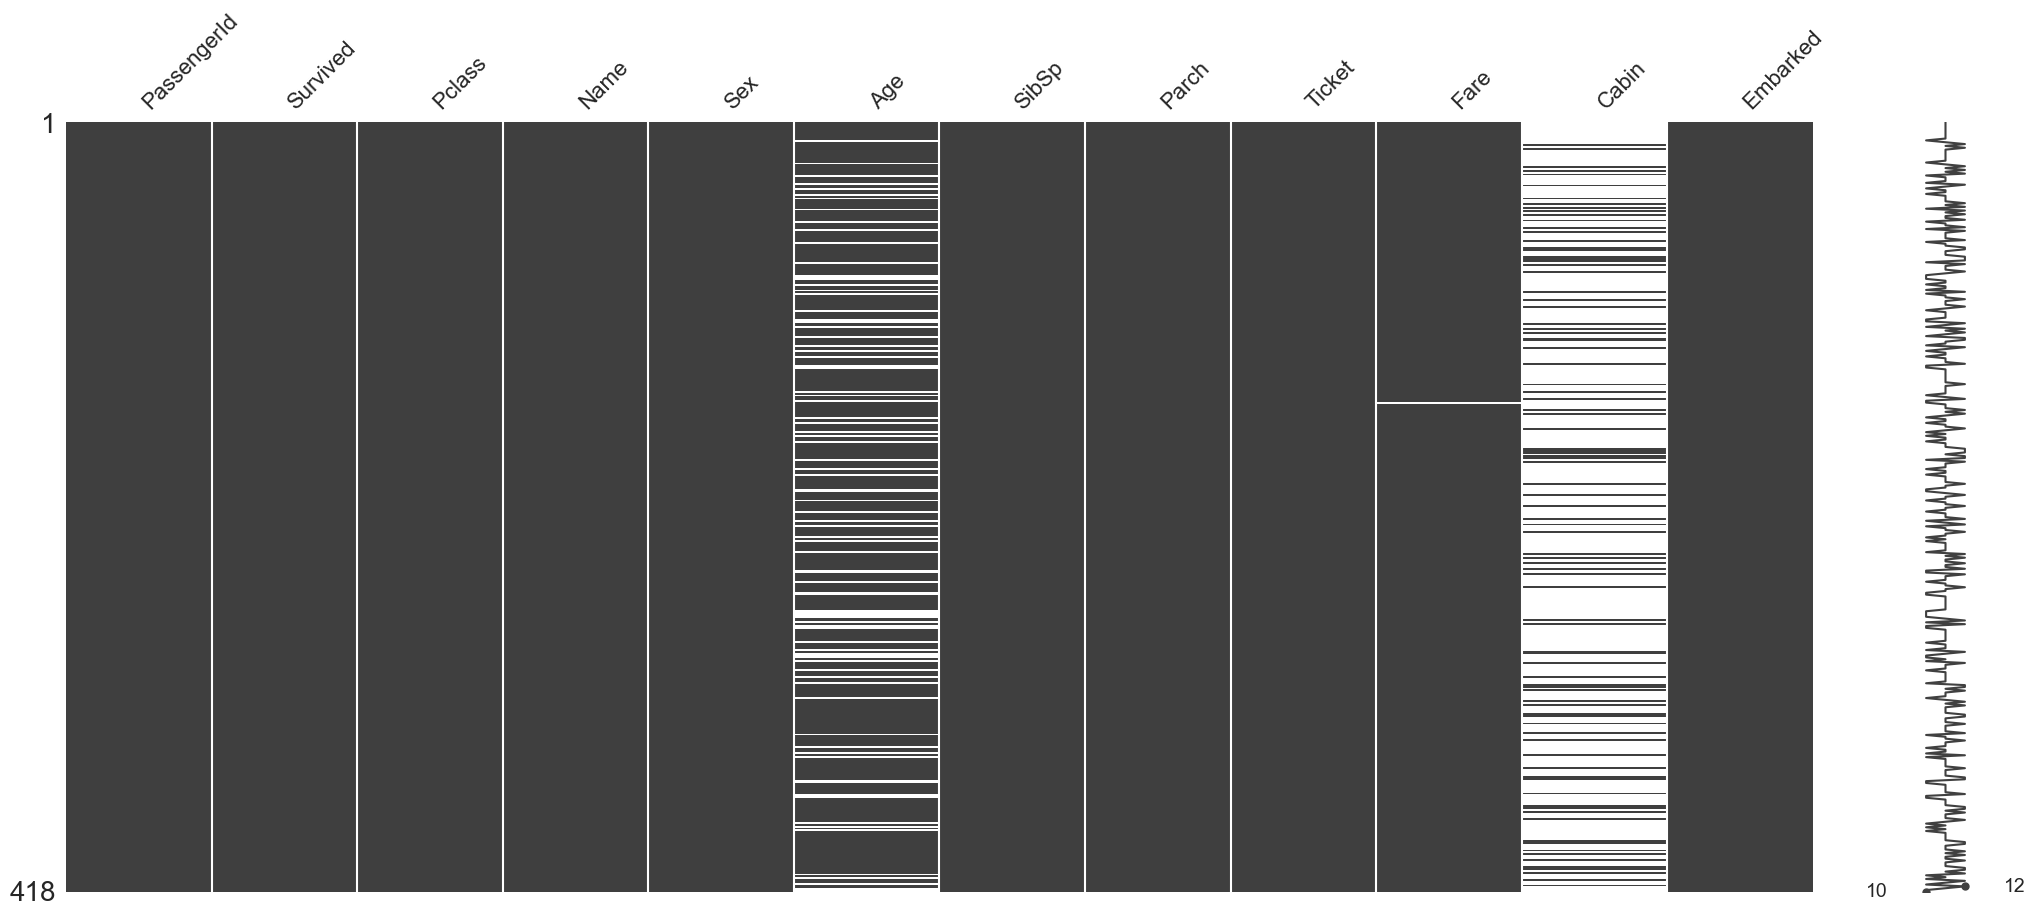

In [7]:
## Visualize missing data
msno.matrix(df)

In [8]:
## Manage this missing data(Age,Fare,Cabin):
#First: Remove Cabin columns because of too many missing values
df.drop(['Cabin'],axis=1,inplace=True)

In [9]:
#testing:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [10]:
##replace of missing'Fare' 'Age' column
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Fare'].fillna(df['Fare'].mean(), inplace = True)
#test
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [11]:
### Check if there is any duplicated rows in our data
df.duplicated().any()

False

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<Axes: >

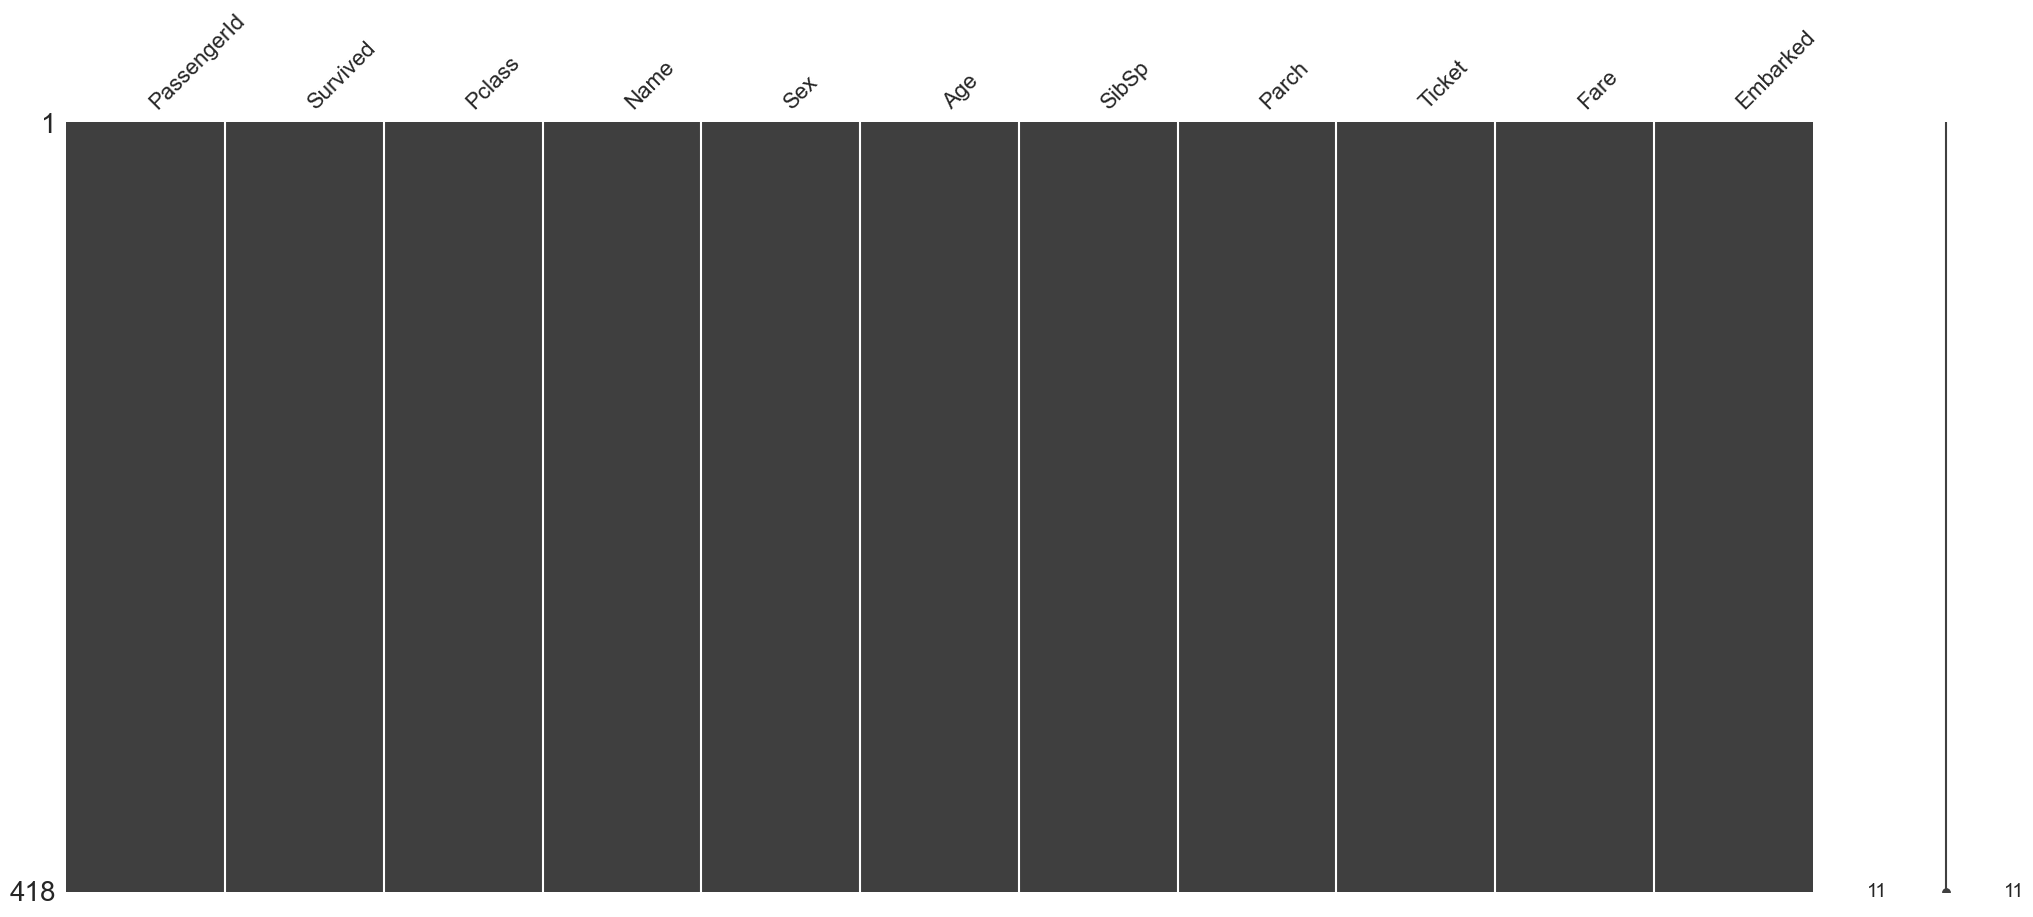

In [13]:
msno.matrix(df)

### Visualization

percentage of pasaggers who didn't survived is 63.63636363636363 %


,Survived
Survived,
0,266
1,152


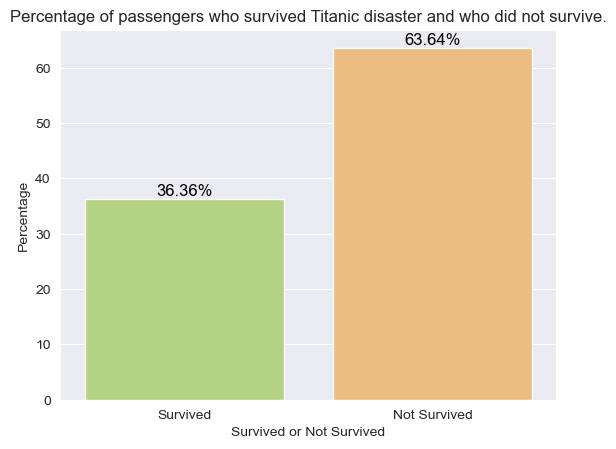

In [14]:
# percentage of survived and no survived
print(f"percentage of pasaggers who didn't survived is { (1-df.Survived.mean())*100 } %" )
#how many people have survived
display(df.groupby('Survived')[['Survived']].count())
#Percentage of passengers who survived Titanic disaster and who did not survive.
no_survive=len(df[df.Survived==0])/len(df.Survived)
survive=len(df[df.Survived==1])/len(df.Survived)
categories = ['Survived', 'Not Survived']
percentages = [survive * 100, no_survive * 100]
a=sns.barplot(x=categories, y=percentages, palette='RdYlGn_r')
plt.title('Percentage of passengers who survived Titanic disaster and who did not survive.')
plt.ylabel('Percentage')
plt.xlabel('Survived or Not Survived')
# Add percentages to each bar
for i, percentage in enumerate(percentages):
    a.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12, color='black')
# Show the plot
plt.show()

        Sex
Sex        
female  152
male    266


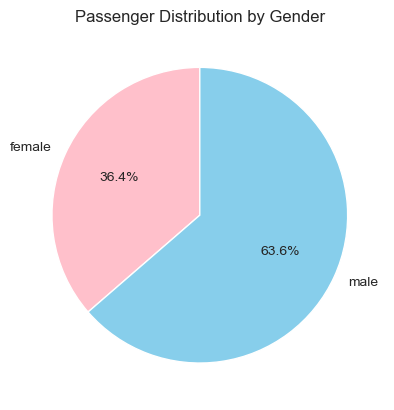

In [15]:
#Passenger Distribution by Gender
sex_counts = df.groupby('Sex')['Sex'].count()
print(pd.DataFrame(sex_counts))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['pink', 'skyblue'], startangle=90)
plt.title('Passenger Distribution by Gender')
plt.show()

Sex,female,male
Survived,,
0,NaN,266.0
1,152.0,NaN


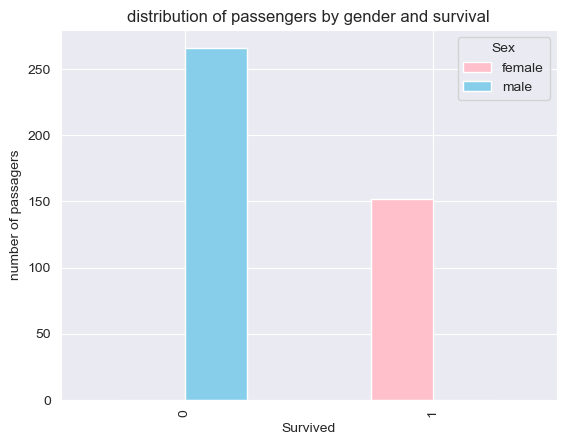

In [16]:
grouped_data = df.groupby(['Sex', 'Survived']).size().unstack('Sex')
display(grouped_data)
ax = grouped_data.plot(kind='bar', color=['pink', 'skyblue'])
ax.set_ylabel('number of passagers')
ax.set_title('distribution of passengers by gender and survival')
plt.show()

,Age
Sex,
female,76.0
male,67.0


,Age
Sex,
female,0.17
male,0.33


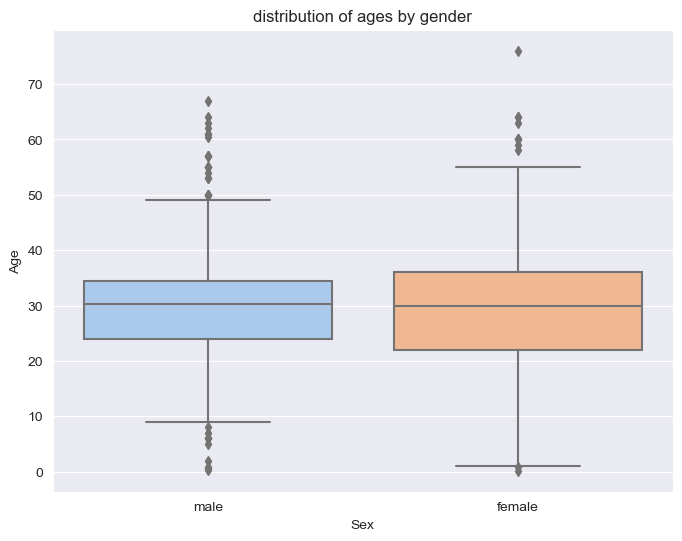

In [17]:
display(df.groupby('Sex')[['Age']].max())
display(df.groupby('Sex')[['Age']].min())
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', data=df, palette='pastel')
plt.title('distribution of ages by gender')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

Pclass
1    107
2     93
3    218
Name: Pclass, dtype: int64

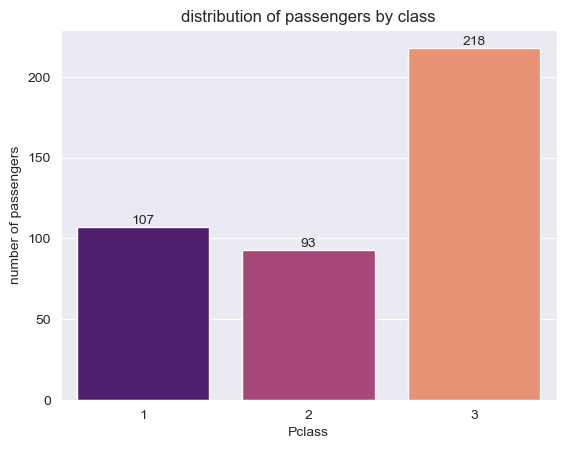

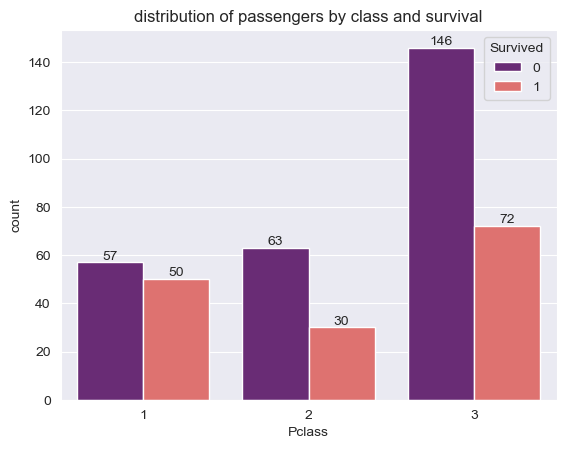

In [18]:
pc = df.groupby('Pclass')['Pclass'].count()
display(pc)
ax = sns.barplot(x=pc.index, y=pc.values, palette='magma')
ax.bar_label(ax.containers[0])
ax.set_ylabel('number of passengers')
ax.set_title('distribution of passengers by class')
plt.show()

a = sns.countplot(x='Pclass', data=df, hue='Survived', palette='magma')
a.set_title('distribution of passengers by class and survival')
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.show()

Embarked
C    102
Q     46
S    270
Name: Embarked, dtype: int64

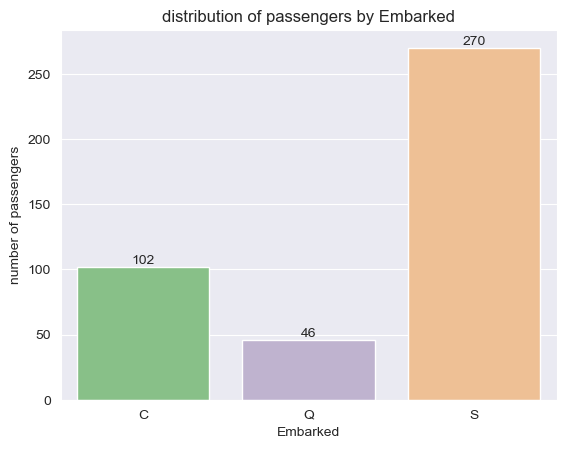

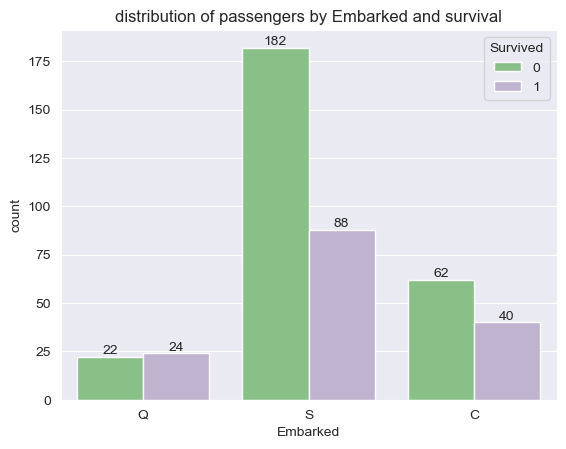

In [19]:
pa = df.groupby('Embarked')['Embarked'].count()
display(pa)
az = sns.barplot(x=pa.index, y=pa.values, palette='Accent')
az.bar_label(az.containers[0])
az.set_ylabel('number of passengers')
az.set_title('distribution of passengers by Embarked')
plt.show()

ab = sns.countplot(x='Embarked', data=df, hue='Survived', palette='Accent')
ab.set_title('distribution of passengers by Embarked and survival')
ab.bar_label(ab.containers[0])
ab.bar_label(ab.containers[1])
plt.show()

### Label Encoding

In [20]:
#Modeling:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace = True)
X=df.drop(['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


# Model Evaluation
#### Logistic regression model

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
print(X.shape,X_train.shape, X_test.shape,Y.shape, Y_train.shape, Y_test.shape)
print(Y_test)

(418, 7) (334, 7) (84, 7) (418,) (334,) (84,)
321    0
324    1
388    0
56     0
153    1
      ..
57     0
126    0
24     1
17     0
66     1
Name: Survived, Length: 84, dtype: int64


In [23]:
#Model Training
#Using Logistic Regression
model= LogisticRegression(random_state=42,max_iter=1000)
# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [24]:
t
predictions = model.predict(X_test)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1]


In [25]:
accuracy = accuracy_score(Y_test, predictions)
print(f'accuracy : {accuracy * 100:.2f}%')

Précision du modèle : 100.00%


In [26]:
print('Rapport de classification :\n', classification_report(Y_test, predictions))

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



### Summary
**.** Survival rates from the Titanic disaster show that 36.36% of passengers survived, while 63.64% did not.

**.** All females survived the catastrophe, whereas none of the males aged between 0.33 and 67 years survived.

**.** A higher number of non-survivors belonged to Passenger Classes 3 and 2.

**.** Passengers boarding from Queenstown had better survival odds, whereas those boarding from Southampton had lower chances of survival.

**.** The logistic regression models achieved 100% accuracy.